## Este dataset contém dados de saúde de mulheres para prever os níveis de glicose no sangue

In [1]:
import pandas as pd

In [2]:
diabetes_df = pd.read_csv("diabetes_clean.csv")

In [3]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. pregnancies -  Número de gestações 
2. triceps -  triceps skinfold - medida utilizada para estimar a quantidade de gordura corporal em uma pessoa
3. insulin -  Nível de insulina
4. bmi - Índice de massa corporal
5. age - idade (em anos)
6. diabetes - status de diabetes
7. glucoste(target) - nível de glucose no sangue

## Variável Dependentes X Independente

In [4]:
X = diabetes_df.drop("glucose", axis= 1).values
y = diabetes_df["glucose"].values


## Fazendo previsões com uma única variável - bmi

In [5]:
X_bmi = X[:,4]

In [6]:
print(X_bmi.shape, y.shape)

(768,) (768,)


Nossa variável independente deve ser formatada para um array bidimensional para ser aceite pelo scikit-learn

In [7]:
#Conversao do formato da variável X_bmi para um array bidimensional
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


## Gráfico - Glucose X Body Mass Index (bmi)

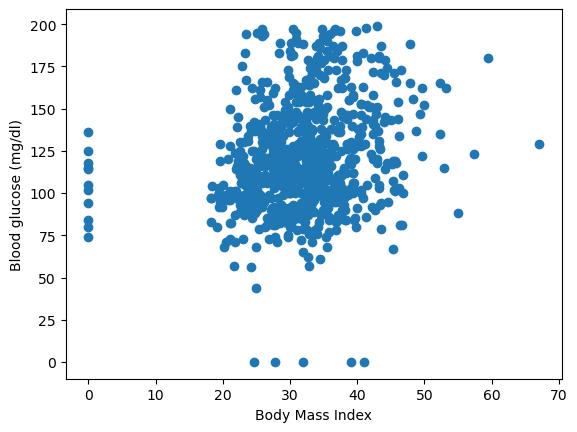

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

É possível analisar que quanto maior o índice de massa corporal maior é o nível glucose

## Modelo de regressão Linear

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(X_bmi, y)

LinearRegression()

In [12]:
predictions = reg.predict(X_bmi)
#Isso nos possibilita obter uma linha de regressão dos nossos dados. 

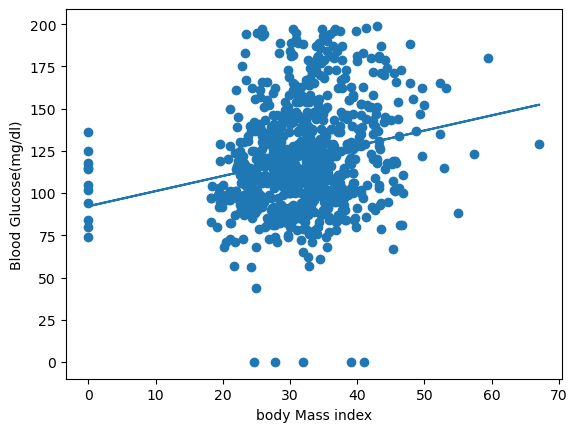

In [13]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose(mg/dl)")
plt.xlabel("body Mass index")
plt.show()

Concluímos existir uma correlção linear positiva entre ambas as variáveis. 

## Linear Regresssion to predict Blood glucose levels using all features from the diabetes Dataset

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.28280468810375137

## Classification model with Knn 

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

In [15]:
X =  diabetes_df[['bmi', 'age']].values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 42)

In [16]:
##### Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[116  35]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



Excellent! The model produced 35 true positives and 33 false positives, meaning precision was less than 50%, which is confirmed in the classification report. 
The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## Building a Logistic Regression 

Let's build a model to be used to predict the probability of individuals in the test set having a diabetes diagnosis. 
Build a logistic regression model using all features in the diabetes_df dataset. 

In [23]:
X =  diabetes_df.drop("diabetes", axis= 1).values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 42)

In [24]:


# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

#Predictions with the models
y_pred = logreg.predict(X_test)

# Predict probabilities
#When creating y_pred_probs you will need to slice the second column of the results,
#which contains all positive probabilities, using the syntax [:, 1]
y_pred_probs = logreg.predict_proba(X_test)[:,1]

print(y_pred_probs[:10])

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

[0.26551023 0.18336615 0.12119644 0.15613532 0.49611206 0.44582202
 0.01359246 0.61646101 0.55640533 0.79311799]


C:\Users\KevinTohounkePixelIn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. 

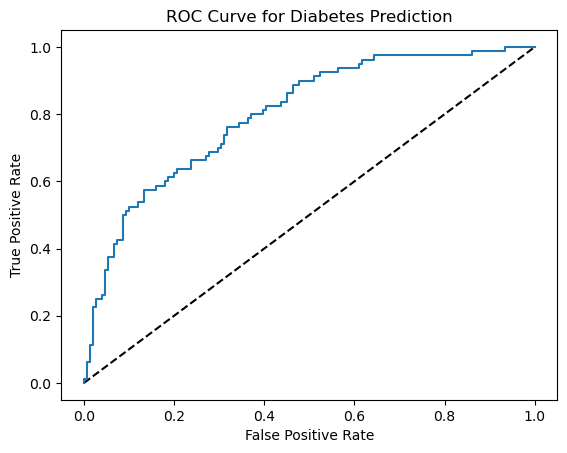

[1.96767615 0.96767615 0.96396599 0.9009721  0.90039049 0.88059864
 0.87978298 0.82376656 0.80936409 0.80262862 0.79311799 0.79074871
 0.79004149 0.77091651 0.76554899 0.74834933 0.74223083 0.72446672
 0.7243272  0.70749477 0.69558148 0.65924595 0.64860478 0.64426412
 0.64379577 0.64361274 0.6230326  0.62102184 0.61646101 0.59358225
 0.55426583 0.54975487 0.53954622 0.52928546 0.52273031 0.51380337
 0.50574171 0.504337   0.49611206 0.48807185 0.44582202 0.41388248
 0.39225033 0.38441596 0.36633602 0.35980755 0.34548573 0.34537508
 0.34511158 0.34384209 0.33659501 0.32078094 0.31917923 0.31343415
 0.29633822 0.29070678 0.2761743  0.27292993 0.27101001 0.26732876
 0.26308569 0.26130207 0.25891869 0.25868061 0.24615207 0.23981764
 0.22945726 0.22811275 0.21995217 0.21708902 0.21101213 0.20603466
 0.18172758 0.17304945 0.16501117 0.16469383 0.13873615 0.13651332
 0.11950477 0.11906736 0.11793941 0.11719813 0.11255107 0.11239255
 0.062126   0.06086064 0.03023437 0.02870459 0.00301001]


In [31]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

## ROC AUC 

In [33]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))


# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8002483443708608
[[121  30]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Did you notice that logistic regression performs better than the KNN model across all the metrics you calculated?
A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.